# Stack Overflow Survey Analysis 2023

## 3. Salary of Respondents
One of the key insights that arises from the Stack Overflow Survey is the tech industry's financial compensation for their skills. It will be very beneficial to understand the distribution of salary across different parameters.
Goals
1. Explore different parameters related to salary
2. Create predictive model

### Import Packages and Load Data

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load settings
pd.set_option('display.max_columns', None)

# change the float decimal
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# load data
data =  pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Stack Overflow Survey Analysis/Stack-Overflow-Survey-Analysis-2023/data for chapters/data.csv')

# rename 'ResponseId' to index
data.set_index('ResponseId',inplace=True)

# rename 'ConvertedCompYearly' with 'Salary'
data = data.rename(columns={'ConvertedCompYearly':'Salary'})

# drop 'CompTotal'
data.drop(columns='CompTotal',inplace=True)

# display data to observe changes
data

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,Industry,Salary
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,United States of America,USD\tUnited States dollar,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,"Information Services, IT, Software Development...",285000.00
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,United States of America,USD\tUnited States dollar,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,"Information Services, IT, Software Development...",250000.00
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",100 to 499 employees,I have some influence,United States of America,USD\tUnited States dollar,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,NaN,NaN,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Slack;Zoom,NaN,NaN,NaN,156000.00
5,I agree,I am a developer

### Import Functions

#### Preprocess data

In [3]:
def get_na_percentages(data,axis):
    # get the number of rows as the denominator
    if axis == 0:
        num_rows = len(data)

        # get the number of nan values
        nan_counts = data.isna().sum(axis=axis)

        # get the percentage values
        nan_percentage = (nan_counts/num_rows) * 100

    else:
        num_cols = data.shape[1]

        # get the number of nan values
        nan_counts = data.isna().sum(axis=axis)

        # get the percentage values
        nan_percentage = (nan_counts/num_cols) * 100

    return nan_percentage

#### Plot Graphs
- Histogram

In [4]:
def plot_histogram(data, bins, title, xlabel, ylabel, color='blue', grid=True):

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    if grid:
        plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.show()

#### Descriptive Analytics
- Z-Score
- Removing Percentile of Data

In [5]:
def calculate_z_scores(series):
    mean = np.mean(series)
    std_dev = np.std(series)
    z_scores = (series - mean) / std_dev
    return z_scores

In [6]:
def remove_top_quantile(data, column, quantile):
    quantile_value = data[column].quantile(quantile)
    filtered_data = data[data[column] <= quantile_value]
    return filtered_data

### Descriptive Statistics for Salary

In [7]:
# get the nan values 
print(f'The percentage of nan values is {(1-(data.Salary.describe()[0])/data.shape[0])*100}') 

The percentage of nan values is 45.42117047999


The 'Salary' column has 45.42% as nan values. This is quite a high value, likely due to privacy concerns by the respondents. I am going to remove all of those respondents who did not respond to this question.

In [8]:
# drop those respondents who had nan as their response to 'Salary'
# create a mask for those with na as response for salary 
nan_salary_mask = data['Salary'].isna()

# remove those where the mask is true
data = data[~nan_salary_mask]

# display the data to ensure that the na values were removed from the dataframe
data

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,Industry,Salary
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,United States of America,USD\tUnited States dollar,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,"Information Services, IT, Software Development...",285000.00
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,United States of America,USD\tUnited States dollar,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,"Information Services, IT, Software Development...",250000.00
4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,12,7,"Developer, front-end",100 to 499 employees,I have some influence,United States of America,USD\tUnited States dollar,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,NaN,NaN,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Slack;Zoom,NaN,NaN,NaN,156000.00
5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",B

In [9]:
# look at the important statistics of salary
print(f'The minimum salary is ${data.Salary.min()}')
print(f'The maximum salary is ${data.Salary.max()}')
print(f'The standard deviation for salary is ${data.Salary.std()}')
print(f'The median salary is ${data.Salary.median()}')
print(f'The mean salary is ${data.Salary.mean()}')

The minimum salary is $1.0
The maximum salary is $74351432.0
The standard deviation for salary is $681418.8387120215
The median salary is $74963.0
The mean salary is $103110.08171765343


The difference between the minimum and maximum salary is $74,351,431 with a standard deviation of $681,418.84. This highlights a critical issue with understanding distribution of salary as the z-score below the mean would have a minimum far less than 1 where as there are maximum values which would have greater than 10 zscore. This is due to the small minority of individuals who skew the data but such a drastic amount.

In [10]:
# remove the top 1% of income earners
data = remove_top_quantile(data,'Salary',0.99)

# check to see the new std
data['Salary'].std()

65943.35872431744

The standard deviation has changed from 680k to just 66k which shows that the top 1% of the earners were skewing the data, but by removing this data the distribution can be understood more.

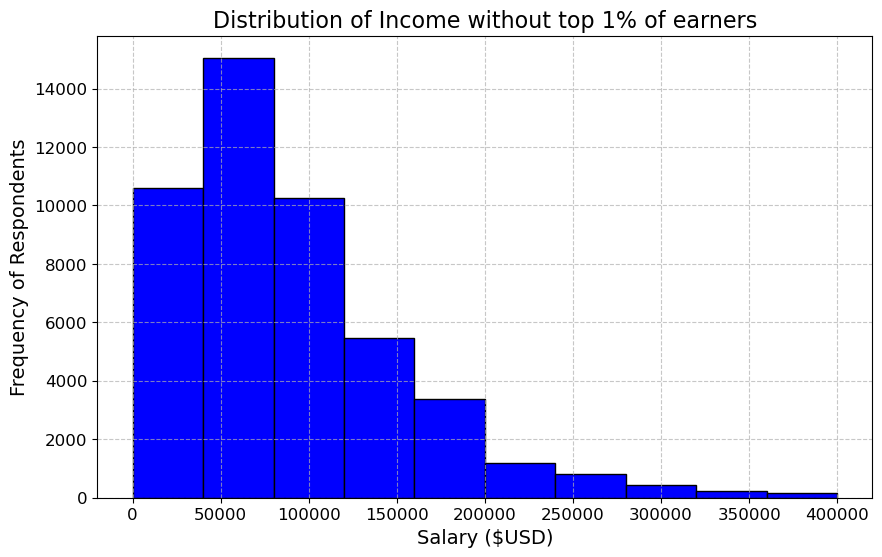

In [11]:
# create a histogram of the plot
plot_histogram(data['Salary'],10,'Distribution of Income without top 1% of earners','Salary ($USD)','Frequency of Respondents')

### What makes a high earning respondent?
Salary is one of the most important factors for many individuals in the tech industry. It is known for being a lucurative job and many individuals will enter the field with this knowledge and will want to maximise their opportunity to achieve this. The following are potential parameters that will lead to an increase in salary
- Country of Residency
- Education Level
- Industry Experience (years of coding, which industry your role is in)

#### 3.1 Salaries in Different Countries
- Which country has the highest and lowest salary
- How does the median of each country compare from the survey to the global median income

In [12]:
import plotly.express as px

In [13]:
country_data = px.data.gapminder()

In [14]:
map_fig = px.scatter_geo(
    country_data,
    locations = 'iso_alpha',
    projection = 'orthographic',
    color = 'continent',
    opacity=0.8,
    hover_name = 'country',
    hover_data = ['lifeExp','pop']
)

map_fig.show()

##### Remove Low Responding Countries
For accuracy amongst inferential data collected, removing the countries with less than 10 respondents is going to ensure that the generalised values such as mean or median is accurately reflected by a high number of respondents to counteract outliers. 

Any analysis to do with countries is going to remove the countries as listed below.

In [15]:
# get a count of respondents with different countries
country_respondents_count = data.groupby('Country')['Salary'].count()

# create mask which has less than 10 respondents per country
country_sub_10_respondents_mask = country_respondents_count > 10

# extract the list of countries with less than 10 respondents
country_sub_10_respondents_list = country_sub_10_respondents_mask[~country_sub_10_respondents_mask].index

# output the countries that have been removed
country_sub_10_respondents_list

Index(['Afghanistan', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Bahrain',
       'Barbados', 'Belize', 'Benin', 'Botswana', 'Brunei Darussalam',
       'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Côte d'Ivoire',
       'Djibouti', 'Dominica', 'Fiji', 'Gabon', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Isle of Man', 'Jamaica', 'Kosovo', 'Kuwait',
       'Lao People's Democratic Republic', 'Lesotho', 'Libyan Arab Jamahiriya',
       'Liechtenstein', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Mauritania', 'Monaco', 'Mozambique', 'Namibia', 'Niger', 'Oman',
       'Palau', 'Qatar', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Senegal', 'Sierra Leone',
       'Somalia', 'Sudan', 'Suriname', 'Swaziland', 'Tajikistan', 'Togo',
       'Trinidad and Tobago', 'Turkmenistan', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country')

The countries listed above that are going to be removed consist of about 650 respondents from Asia, Europe, Oceania, the Middle East and the Carribbean. It is likely that the people who use the website that the survey was collected from does not have as high of an outreach to these countries. Removing this data is going to be useful for understanding the spread of salaries.

In [16]:
# create a list of those countries who have greater than 10 respondents
countries_10_plus_respondents = country_sub_10_respondents_mask[country_sub_10_respondents_mask].index.tolist()

# create a dataframe with those countries with greater than 10 respondents
countries_ten_plus_df = data[data['Country'].isin(countries_10_plus_respondents)]

# create a median of each country
median_salary_survey_country = countries_ten_plus_df.groupby('Country').median()

# sort the data
median_salary_survey_country_sorted = median_salary_survey_country.sort_values(by='Salary',ascending=False)

# output the top 5
print(f'Top 10 Countries Median Salary:{median_salary_survey_country_sorted.head(10)}')

Top 10 Countries Median Salary:                            Salary
Country                           
United States of America 150000.00
Switzerland              121238.00
Israel                   112257.00
Luxembourg               107090.00
Nomadic                  100000.00
Ireland                   96381.00
Australia                 95851.00
Denmark                   93173.00
Canada                    89222.00
Iceland                   85182.00


The United States of America stands out as an outler with a median income of 150k a year with Switzerland with a median value almost 30k less. The use of the median income reduces the effects of individual outliers who may have far higher incomes which would skew the data. 

Also observe that there is a country called Nomadic, this is not commonly known as a single country so lets investigate:

In [17]:
# look at the currency to try to understand where 'Nomadic' is
data[data['Country'] == 'Nomadic']['Currency'].value_counts()

USD\tUnited States dollar     9
EUR European Euro             4
DKK\tDanish krone             1
KYD\tCayman Islands dollar    1
BGN\tBulgarian lev            1
INR\tIndian rupee             1
Name: Currency, dtype: int64

The majority currency is in USD and EUR so this does not help much. I am not going to remove the data from the df but it is important to take note.

The next question is: do these respondents get paid less on average by their country or is it due to the lack of payment for these jobs in the countries. To answer this, import global median income values. Let's compare the position of the country based on their survey ranking for median salary compared with their global ranking.

##### Nations with highest Global Median Income

In [18]:
# download median income by country to see how incomes compare
global_median_income = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Stack Overflow Survey Analysis/Stack-Overflow-Survey-Analysis-2023/imported data/median-income-by-country-2024.csv')

# drop na values
global_median_income = global_median_income[['country','medianIncomeByCountry_medianIncome']].dropna()

# rename columns
global_median_income.rename(columns={'medianIncomeByCountry_medianIncome':'Global Median Salary'},inplace=True)

# output data
global_median_income

,country,Global Median Salary
2,United States,24327.00
3,Pakistan,1399.00
4,Nigeria,825.00
5,Brazil,4230.00
6,Bangladesh,1131.00
...,...,...
156,Kiribati,1489.00
157,Micronesia,1413.00
158,Tonga,2782.00
159,Seychelles,7118.00


In [19]:
# sort by median income
global_median_income_sorted = global_median_income.sort_values(by='Global Median Salary',ascending=False)

# give a number ranking as a new column
global_median_income_sorted['Ranking Global Median Salary'] = range(1,len(global_median_income_sorted)+1)

global_median_income_sorted.set_index('country',inplace=True)

global_median_income_sorted

,Global Median Salary,Ranking Global Median Salary
country,,
Luxembourg,28382.00,1
United Arab Emirates,26324.00,2
United States,24327.00,3
Norway,23835.00,4
Switzerland,23488.00,5
...,...,...
Central African Republic,491.00,155
Malawi,484.00,156
Burundi,475.00,157


In [20]:
# rename column
median_salary_survey_country_sorted.rename(columns={'Salary':'Survey Median Salary'},inplace=True)

# create ranking
median_salary_survey_country_sorted['Ranking Survey Median Salary'] = range(1,len(median_salary_survey_country)+1)

# reset index to replace values in country column
median_salary_survey_country_sorted.reset_index(inplace=True)

# replace values so that they can be similar with other df
median_salary_survey_country_sorted['Country'] = median_salary_survey_country_sorted['Country'].replace({
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
})

# set country to index so that it can join with global median df
median_salary_survey_country_sorted.set_index('Country',inplace=True)

In [21]:
# merge the two dataframes to compare rankings with one another
salary_comparison_df = median_salary_survey_country_sorted.merge(global_median_income_sorted,left_index=True,right_index=True)

# show the top 10
salary_comparison_df.sort_values(by='Survey Median Salary',ascending=False).head(10)

,Survey Median Salary,Ranking Survey Median Salary,Global Median Salary,Ranking Global Median Salary
United States,150000.00,1,24327.00,3
Switzerland,121238.00,2,23488.00,5
Israel,112257.00,3,12282.00,30
Luxembourg,107090.00,4,28382.00,1
Ireland,96381.00,6,17962.00,17
Australia,95851.00,7,19363.00,12
Denmark,93173.00,8,20593.00,9
Canada,89222.00,9,20550.00,10
Iceland,85182.00,10,20630.00,8
United Kingdom,81931.00,11,16907.00,19


Notice that the median salary for survey respondents seem to perform overall much better than their global median salary. This suggests that these countries such as Israel, Ireland, Australia and United Kingdom are paying their Data jobs at a better rate than other jobs.

##### Spread of Nations Pay for Data Roles

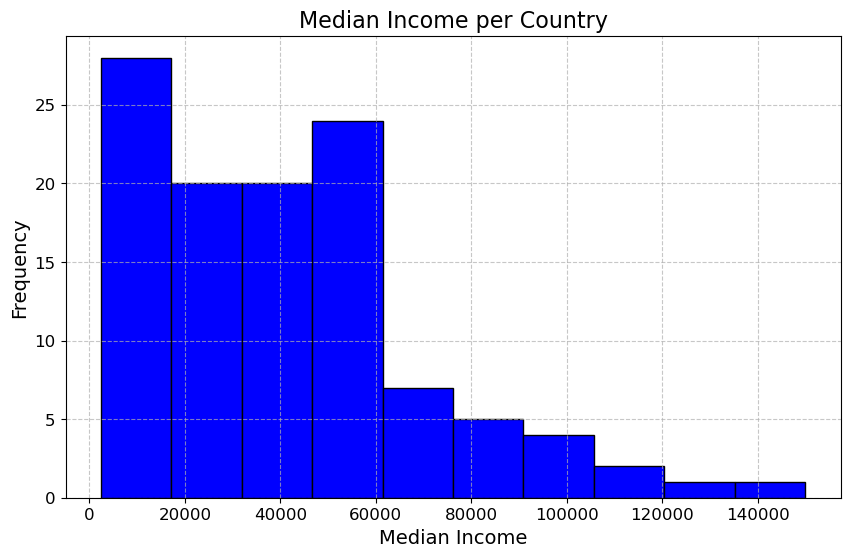

In [22]:
# plot all the countries median salaries
plot_histogram(median_salary_survey_country,10,'Median Income per Country','Median Income','Frequency')

Notice that only a small percentage of countries are paying their Data roles at greater than 60k a year. Meanwhile some nations are recieving between 0-20k which is likely due to the lower median salary of these nations, let's look at the opposite end of the survey salary vs global median salary rankings

In [23]:
# show the lowest 20 countries for median pay
salary_comparison_df.tail(20).sort_values(by='Survey Median Salary',ascending=True)

,Survey Median Salary,Ranking Survey Median Salary,Global Median Salary,Ranking Global Median Salary
Myanmar,2385.00,112,1909.00,102
Ghana,4437.00,111,1779.00,104
Ethiopia,4841.00,110,907.00,130
Pakistan,5952.00,109,1399.00,114
Nepal,6063.00,108,1155.00,121
Bangladesh,6508.00,106,1131.00,123
Egypt,7954.00,103,1485.00,110
Tunisia,8030.00,102,3366.00,69
Algeria,8782.00,101,2612.00,85
Uganda,9654.00,100,804.00,139


The comparison also shows that those countries with lower Median salaries in the survey are also those with lower Global Median Salaries. Notice that those in Data role are still earning far higher than the average for every country. Proving that these roles are lucaritve in every country. However this highlights an even greater wealth distribution problem amonst nations as a majority of countries typical person is earning less than 60k a year while a typical person in the US is earnign 150k a year.

##### Compare Global Income level with Survey Data
As it is difficult to generalise countries data for future predictive analysis, import data by the world bank and compare how the low income, lower middle income, upperm iddle income and high income compares with the median salaries of countries. The goal is to then have 4 different nation types for their salaries to then be included in a predictive model.

In [24]:
# import the data from excel
income_class = pd.read_excel('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Stack Overflow Survey Analysis/Stack-Overflow-Survey-Analysis-2023/imported data/CLASS.xlsx')

# choose the specific columns that are relevant
income_class = income_class[['Economy','Income group']]

income_class.rename(columns={'Income group':'Income Level (imported data)'},inplace=True)

# set the index to economy (country)
income_class.set_index('Economy',inplace=True)

# output the data
income_class

,Income Level (imported data)
Economy,
Aruba,High income
Afghanistan,Low income
Angola,Lower middle income
Albania,Upper middle income
Andorra,High income
...,...
Sub-Saharan Africa,NaN
Sub-Saharan Africa (excluding high income),NaN
Sub-Saharan Africa (IDA & IBRD),NaN


In [25]:

# Assuming median_salary_survey_country is a DataFrame containing 'Salary' column

# Calculate max and min values
median_salary_country_max_value = median_salary_survey_country['Salary'].max()
median_salary_country_min_value = median_salary_survey_country['Salary'].min()

# Calculate the range (difference between max and min)
min_max_difference_median_salary_country = median_salary_country_max_value - median_salary_country_min_value

# Normalize salaries by dividing each by the range
median_salary_survey_country_min_max = median_salary_survey_country['Salary'] / min_max_difference_median_salary_country

# Calculate percentiles
salary_percentiles = np.percentile(median_salary_survey_country_min_max, [25, 50, 75, 100])

# Define income classes based on percentiles
income_class_low = salary_percentiles[0]
income_class_low_middle = salary_percentiles[1]
income_class_middle = salary_percentiles[2]
income_class_high = salary_percentiles[3]

# Function to classify income based on normalized salary
def classify_income(salary):
    if salary <= income_class_low:
        return 'Low income'
    elif salary <= income_class_low_middle:
        return 'Lower middle Income'
    elif salary <= income_class_middle:
        return 'Upper middle Income'
    else:
        return 'High income'

In [26]:
# Apply the classification function to each element in the Series
income_groups = median_salary_survey_country_min_max.apply(classify_income)

# Add the income_groups to your DataFrame for further analysis if needed
median_salary_survey_country['Survey IncomeGroup'] = income_groups

income_group_comparison = median_salary_survey_country.merge(income_class,left_index=True,right_index=True)
income_group_comparison

,Salary,Survey IncomeGroup,Income Level (imported data)
Albania,10741.00,Low income,Upper middle income
Algeria,8782.00,Low income,Lower middle income
Argentina,30000.00,Lower middle Income,Upper middle income
Armenia,52054.00,Upper middle Income,Upper middle income
Australia,95851.00,High income,High income
...,...,...,...
Uganda,9654.00,Low income,Low income
Ukraine,44420.00,Upper middle Income,Lower middle income
United Arab Emirates,58792.00,High income,High income
Uruguay,50996.00,Upper middle Income,High income


#### 3.2 Salaries with Different Education Levels
From looking at the inital demographics, it is clear that a majority of those who answered this have some type of degree. Let's try to see how much on average an individual will make as a result of obtaining a new degree

In [27]:
# rename the list of EdLevel to be more simple
ed_level_unique = data['EdLevel'].dropna().unique()

# create a new list of names for different education level
ed_level_unique_new = ["Bachelor's degree",'Some university',"Master's degree",'Primrary/elemntary school',
                   'Professional degree','Associate degree','Secondary school','Something else']

# using the dict(zip) allows you to replace the old list with a mapping of new values
ed_level_map = dict(zip(ed_level_unique,ed_level_unique_new))

# replace the old values with the new ones
data['EdLevel'] = data['EdLevel'].replace(ed_level_map)

# observe the new unique values
data['EdLevel'].unique()

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_61199/3993256672.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(["Bachelor's degree", 'Some university', "Master's degree",
       'Primrary/elemntary school', 'Professional degree',
       'Associate degree', 'Secondary school', 'Something else'],
      dtype=object)

In [28]:
# group by different education levels
median_salary_survey_edlevel = data.groupby('EdLevel')['Salary'].median()

In [29]:
# this data can be sorted to be ordinal values
# use the same order from above to replace 
ed_level_numeric = [5,3,6,1,7,4,2,0]

# use the same dict(zip) from before to replace the categorical variable as a one hot encoded variable
ed_level_one_hot_map = dict(zip(ed_level_unique_new,ed_level_numeric))

# create a dataframe which replaces categorical variables with their one hot encoded values
# define it as numerical as the goal is to only have numeric values
data_numeric = data.copy()

# change the 'EdLevel' to the mapping values of the one hot encoded values
data_numeric['EdLevel'] = data_numeric['EdLevel'].replace(ed_level_one_hot_map)

# ensure that the new values are clearly observed in the df
data_numeric['EdLevel'].unique()

array([5, 3, 6, 1, 7, 4, 2, 0])

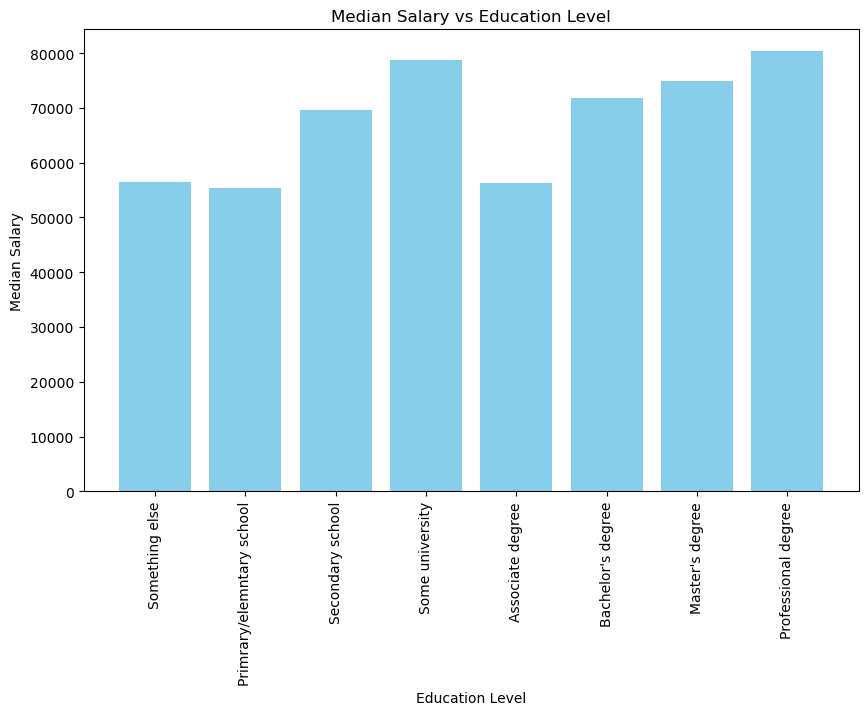

In [30]:
# create a dataframe that orders the data based on education
# the top values will start with PhD's then work down to some other experience of school education
data_sorted_education = data_numeric.sort_values(by='EdLevel',ascending=False)

# create a bar chart to explain the salary comparison with different degrees
plt.figure(figsize=(10, 6))
plt.bar(ed_level_numeric, median_salary_survey_edlevel, color='skyblue')
plt.title('Median Salary vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Median Salary')
plt.xticks(ed_level_numeric, ed_level_unique_new, rotation=90)  # Set x-axis labels and rotation
plt.show()

In [31]:
data[data['Salary']<100]['EdLevel'].value_counts()

Bachelor's degree            115
Master's degree               58
Some university               36
Secondary school              14
Professional degree           11
Primrary/elemntary school      9
Something else                 6
Associate degree               6
Name: EdLevel, dtype: int64

In [32]:
mean_salary_survey_edlevel = data.groupby('EdLevel').mean()
mean_salary_survey_edlevel

,Salary
EdLevel,
Associate degree,84504.09
Bachelor's degree,92294.66
Master's degree,89825.19
Primrary/elemntary school,73433.40
Professional degree,96731.76
Secondary school,67291.98
Some university,83603.00
Something else,64490.44


You can observe that the median value does not change much across different levels of education especially for those going from anything greater than secondary education all the way to a professional degree.

### Feature Selection
The following columns are going to be useful parameters to look at when comparing with yearly income
- EdLevel
- YearsCodePro
- Years Code
- DevType
- OrgSize
- Country
- Industry
- ConvertedCompYearly

In [33]:
# create new dataframe
earnings_data = data[['EdLevel','YearsCodePro','YearsCode','DevType','OrgSize','Country','Industry','Salary']]
earnings_data

,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize,Country,Industry,Salary
ResponseId,,,,,,,,
2,Bachelor's degree,9,18,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,"Information Services, IT, Software Development...",285000.00
3,Bachelor's degree,23,27,"Developer, back-end","5,000 to 9,999 employees",United States of America,"Information Services, IT, Software Development...",250000.00
4,Bachelor's degree,7,12,"Developer, front-end",100 to 499 employees,United States of America,NaN,156000.00
5,Bachelor's degree,4,6,"Developer, full-stack",20 to 99 employees,Philippines,Other,23456.00
6,Some university,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Other,96828.00
...,...,...,...,...,...,...,...,...
89163,Master's degree,24,30,"Developer, back-end","5,000 to 9,999 employees",Brazil,"Information Services, IT, Software Development...",50719.00
89167,Some university,2,7,"Developer, full-stack",20 to 99 employees,Armenia,Financial Services,16917.00
89168,Bachelor's degree,2,6,"Developer, mobile",20 to 99 employees,India,Retail and Consumer Services,15752.00


### Data Cleaning
As the goal for this section is to understand what leads to respondents with a high income. Remove any of the respondents who answered 'Salary' as NA.

In [34]:
# collect those who responses to 'Salary' was na
# create a mask to remove from the 'earnings_data' df
na_for_salary = earnings_data['Salary'].isna()

# remove those who had na responses for 'CompTotal' and 'Salary'
earnings_data = earnings_data[~na_for_salary]

# return dataframe
# this dataframe is going to be used for analysis
earnings_data

,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize,Country,Industry,Salary
ResponseId,,,,,,,,
2,Bachelor's degree,9,18,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,"Information Services, IT, Software Development...",285000.00
3,Bachelor's degree,23,27,"Developer, back-end","5,000 to 9,999 employees",United States of America,"Information Services, IT, Software Development...",250000.00
4,Bachelor's degree,7,12,"Developer, front-end",100 to 499 employees,United States of America,NaN,156000.00
5,Bachelor's degree,4,6,"Developer, full-stack",20 to 99 employees,Philippines,Other,23456.00
6,Some university,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Other,96828.00
...,...,...,...,...,...,...,...,...
89163,Master's degree,24,30,"Developer, back-end","5,000 to 9,999 employees",Brazil,"Information Services, IT, Software Development...",50719.00
89167,Some university,2,7,"Developer, full-stack",20 to 99 employees,Armenia,Financial Services,16917.00
89168,Bachelor's degree,2,6,"Developer, mobile",20 to 99 employees,India,Retail and Consumer Services,15752.00


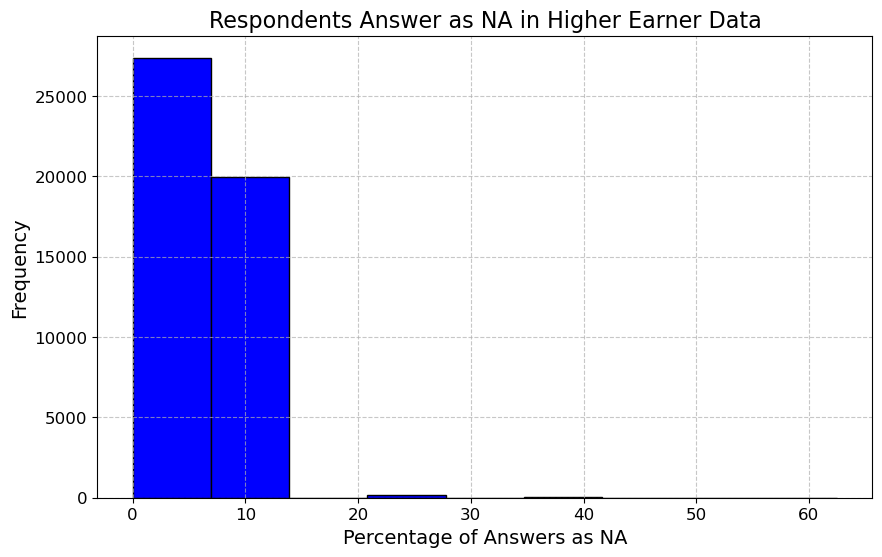

In [35]:
# create a percentage value of na values as responses for the df
earner_data_na_responses = get_na_percentages(earnings_data,1)

# plot the data
plot_histogram(earner_data_na_responses,9,'Respondents Answer as NA in Higher Earner Data','Percentage of Answers as NA','Frequency')

Most of the respondents have very few columns with NA as responses, with none going above about 50% which means that the data has been processed to have enough information to draw insightful conclusions

### One-Hot Encoding DF

In [36]:
# create a copy of the new dataframe which will have one hot encoded values
earnings_data_one_hot = earnings_data.copy()

In [37]:
# create a list of the columns that need to changed to one hot encoded
earnings_data.select_dtypes(include=['object']).columns.tolist()

['EdLevel',
 'YearsCodePro',
 'YearsCode',
 'DevType',
 'OrgSize',
 'Country',
 'Industry']

#### EdLevel
This data represents the type of official education that has been done by the respondent

In [38]:
# output the unique values
education_levels = earnings_data['EdLevel'].unique()
education_levels

array(["Bachelor's degree", 'Some university', "Master's degree",
       'Primrary/elemntary school', 'Professional degree',
       'Associate degree', 'Secondary school', 'Something else'],
      dtype=object)

As this is something that has an order, allocate the following values with their respective numbers
- 'Something else': 0
- 'Primary/elemantary': 1
- 'Secondary school': 2
- 'Some college/university study without earning a degree': 3
- 'Associate degree': 4
- 'Bachelor's degree': 5
- 'Master's degree': 6
- 'Professional degree': 7

In [39]:
# create the list of numbers based on the values in earnings data
ed_level_one_hot = [0,1,2,3,4,5,6,7]
ed_level = ['Something else',
            'Primary/elementary school',
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
            'Some college/university study without earning a degree',
            'Associate degree (A.A., A.S., etc.)',
            'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
            'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
            'Professional degree (JD, MD, Ph.D, Ed.D, etc.)']

# Create a mapping from ed_level to ed_level_one_hot
ed_level_mapping = dict(zip(ed_level, ed_level_one_hot))

earnings_data_one_hot['EdLevel'] = earnings_data['EdLevel'].map(ed_level_mapping)
earnings_data_one_hot

,EdLevel,YearsCodePro,YearsCode,DevType,OrgSize,Country,Industry,Salary
ResponseId,,,,,,,,
2,NaN,9,18,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,"Information Services, IT, Software Development...",285000.00
3,NaN,23,27,"Developer, back-end","5,000 to 9,999 employees",United States of America,"Information Services, IT, Software Development...",250000.00
4,NaN,7,12,"Developer, front-end",100 to 499 employees,United States of America,NaN,156000.00
5,NaN,4,6,"Developer, full-stack",20 to 99 employees,Philippines,Other,23456.00
6,NaN,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Other,96828.00
...,...,...,...,...,...,...,...,...
89163,NaN,24,30,"Developer, back-end","5,000 to 9,999 employees",Brazil,"Information Services, IT, Software Development...",50719.00
89167,NaN,2,7,"Developer, full-stack",20 to 99 employees,Armenia,Financial Services,16917.00
89168,NaN,2,6,"Developer, mobile",20 to 99 employees,India,Retail and Consumer Services,15752.00
